In [15]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score, confusion_matrix
import pickle

In [16]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\NAMANJEET
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
df = pd.read_csv('reviews.txt',sep = '\t', names =['Reviews','Comments'])

In [18]:
df.head()

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [19]:
stopset = set(stopwords.words('english'))

In [20]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)

In [21]:
X = vectorizer.fit_transform(df.Comments)
y = df.Reviews
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
accuracy_score(y_test,clf.predict(X_test))*100

97.47109826589595

In [25]:
pred=clf.predict(X_test)
matrix=confusion_matrix(y_test,pred)

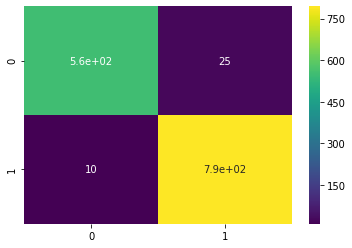

In [31]:
import seaborn as sns
sns.heatmap(matrix, annot=True, cmap="viridis")

In [22]:
filename = 'nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))